In [1]:
from torchvision.datasets import MNIST
import numpy as np

In [2]:
MNIST_train = MNIST('./', download=True, train=True)
MNIST_test = MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
test_images = MNIST_test.test_data

/Users/maria/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/Users/maria/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/maria/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/maria/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


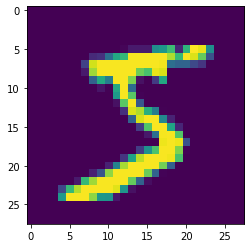

tensor(5)


In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [6]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [7]:
X_train.shape

torch.Size([60000, 1, 28, 28])

# Network architecture

In [8]:
import torch.nn as nn
import torch.optim as optim

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        28 Х 28 -> 28 Х 28 -> 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.act1  = nn.ReLU()
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=0)
        self.act2  = nn.ReLU()
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = nn.Linear(6 * 6 * 10, 100)
        self.act3  = nn.ReLU()
        
        self.fc2   = nn.Linear(100, 10)
        
        self.act4 = nn.Softmax(dim=1)
    
    def forward(self, x, last=True):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        
        x = self.fc2(x)
        if last:
            x = self.act4(x)
        
        return x

# Loss and metrics

In [10]:
net = Net()

In [11]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1.0e-3)

# Training

In [12]:
batch_size = 5000

test_accuracy = []
test_loss = []

for epoch in range(40):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = net.forward(X_test)
    test_loss.append(loss(test_preds, y_test).data)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
    test_accuracy.append(accuracy)
    
    print(accuracy)

tensor(0.5372)
tensor(0.6471)
tensor(0.6753)
tensor(0.6796)
tensor(0.6838)
tensor(0.6868)
tensor(0.6892)
tensor(0.6913)
tensor(0.6928)
tensor(0.7609)
tensor(0.7803)
tensor(0.7865)
tensor(0.7889)
tensor(0.8580)
tensor(0.8710)
tensor(0.8761)
tensor(0.8794)
tensor(0.8808)
tensor(0.8821)
tensor(0.8836)
tensor(0.8845)
tensor(0.8841)
tensor(0.8855)
tensor(0.8853)
tensor(0.8854)
tensor(0.8861)
tensor(0.8861)
tensor(0.8867)
tensor(0.8872)
tensor(0.8869)
tensor(0.8878)
tensor(0.8869)
tensor(0.8872)
tensor(0.8870)
tensor(0.8877)
tensor(0.8877)
tensor(0.8875)
tensor(0.8876)
tensor(0.8874)
tensor(0.8876)


# Confusion Matrix

In [13]:
def confusion_matrix(actual, pred, class_names):
    NUM_CLASSES = len(class_names)
    cm = [[0 for j in range(NUM_CLASSES)] for i in range(NUM_CLASSES)]
    most_similar = [(-1, 0.0) for i in range(NUM_CLASSES * NUM_CLASSES)]

    for (i, labels_prob) in enumerate(pred):
        label = np.argmax(labels_prob.detach().numpy())
        cm[actual[i]][label] += 1

        if labels_prob[label] > most_similar[actual[i].item() * NUM_CLASSES + label][1]:
            most_similar[actual[i].item() * NUM_CLASSES + label] = (i, labels_prob[label])
    
    print(np.array(cm).reshape(-1, NUM_CLASSES))
    
    blank_image = [[255 for j in range(28)] for i in range(28)]
    plt.figure(figsize=(15, 15))
    plt.subplots_adjust(wspace=0.8, hspace=0.1)
    for i in range(NUM_CLASSES * NUM_CLASSES):
        plt.subplot(10, 10, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if most_similar[i][0] == -1:
            plt.imshow(blank_image, cmap=plt.cm.binary)
            continue
        plt.imshow(test_images[most_similar[i][0]], cmap=plt.cm.binary)
        plt.xlabel(class_names[i % NUM_CLASSES])
    plt.show()

[[ 973    0    0    0    0    0    2    1    4    0]
 [   0 1123    2    2    0    0    4    1    3    0]
 [   1    4 1016    0    1    0    1    3    6    0]
 [   0    0    4 1000    0    1    0    3    2    0]
 [   0    0    1    0  978    0    1    1    1    0]
 [   2    0    0    8    1  872    4    0    5    0]
 [   5    2    0    0    2    2  945    0    2    0]
 [   0    3    7    3    2    0    0 1012    1    0]
 [   7    0    5    1    1    2    0    1  957    0]
 [  17    6   12  116  302  190    0  177  189    0]]


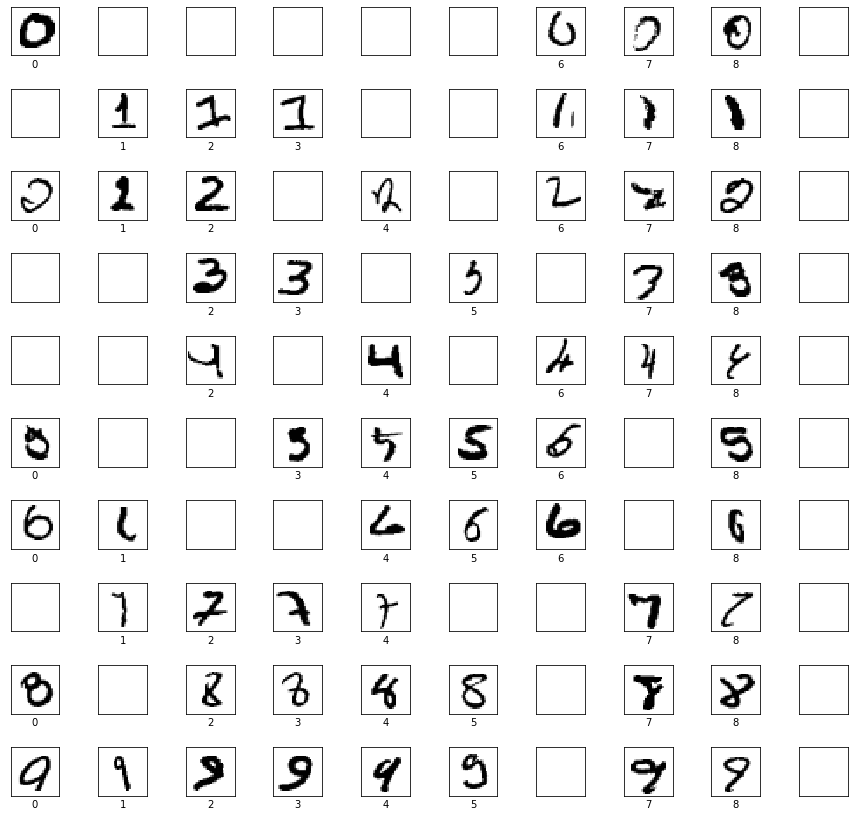

In [14]:
test_preds = net.forward(X_test, last=False)
confusion_matrix(y_test, test_preds, [i for i in range(10)])

# FashionMnist

In [15]:
from torchvision.datasets import FashionMNIST
MNIST_train = FashionMNIST('./', download=True, train=True)
MNIST_test = FashionMNIST('./', download=True, train=False)
test_images = MNIST_test.test_data
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



/Users/maria/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/maria/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/maria/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/maria/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


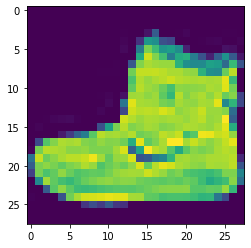

tensor(9)


In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [17]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [18]:
net = Net()
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1.0e-3)

In [19]:
batch_size = 5000

test_accuracy = []
test_loss = []

for epoch in range(40):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = net.forward(X_test)
    test_loss.append(loss(test_preds, y_test).data)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
    test_accuracy.append(accuracy)
    
    print(accuracy)

tensor(0.3550)
tensor(0.3781)
tensor(0.3834)
tensor(0.3861)
tensor(0.3883)
tensor(0.3889)
tensor(0.3902)
tensor(0.3903)
tensor(0.3910)
tensor(0.3913)
tensor(0.3914)
tensor(0.3910)
tensor(0.3923)
tensor(0.3926)
tensor(0.3919)
tensor(0.3924)
tensor(0.3919)
tensor(0.3892)
tensor(0.3910)
tensor(0.3919)
tensor(0.3925)
tensor(0.3922)
tensor(0.3933)
tensor(0.4724)
tensor(0.4952)
tensor(0.5881)
tensor(0.5942)
tensor(0.6059)
tensor(0.6099)
tensor(0.6145)
tensor(0.6549)
tensor(0.7027)
tensor(0.7082)
tensor(0.7112)
tensor(0.7142)
tensor(0.7110)
tensor(0.7155)
tensor(0.7152)
tensor(0.7169)
tensor(0.7481)


[[843   3   0  24  10   3 116   0   1   0]
 [  4 965   0  23   3   1   4   0   0   0]
 [ 57   5   0  10 398   0 529   0   1   0]
 [ 27  10   0 876  38   0  47   0   1   1]
 [  3   3   0  35 863   1  95   0   0   0]
 [  0   0   0   1   0 965   0  22   0  12]
 [139   2   0  28  90   0 734   0   7   0]
 [  0   0   0   0   0   7   0 964   2  27]
 [ 89   8   0 155 111  64 129 129 310   5]
 [  0   0   0   0   0   4   0  35   0 961]]


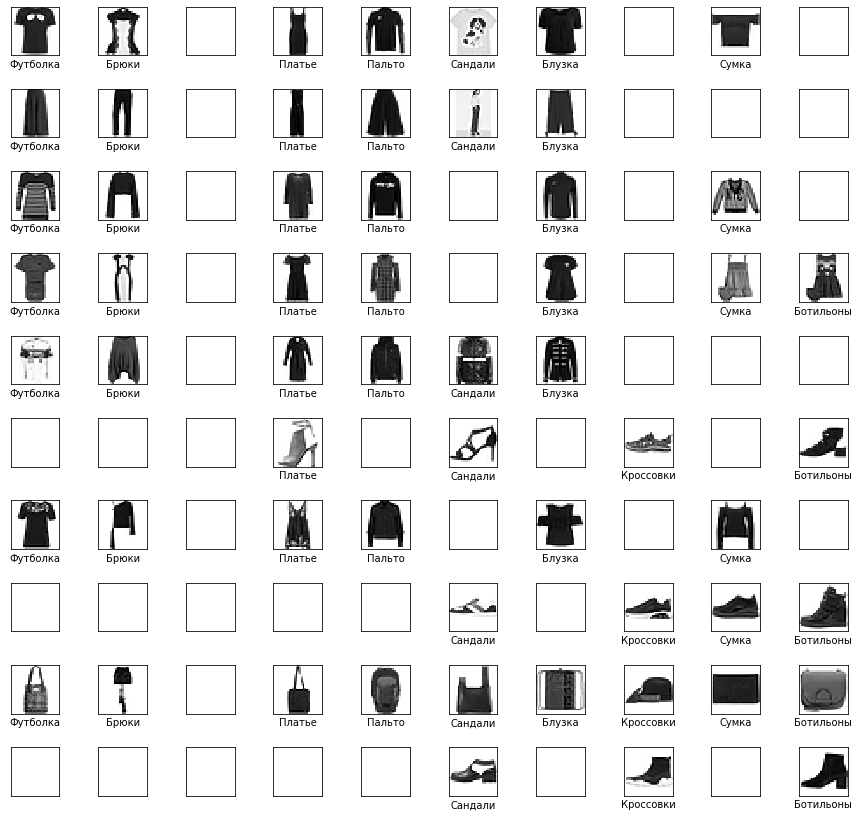

In [20]:
test_preds = net.forward(X_test, last=False)
confusion_matrix(y_test, test_preds, ['Футболка', 'Брюки', 'Свитер', 'Платье', 'Пальто', 'Сандали', 
                                      'Блузка', 'Кроссовки', 'Сумка', 'Ботильоны'])